In [19]:
import pandas as pd
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Carregar os dados
x = pd.read_csv('Processed_data.csv')
y = pd.read_csv("grupos.csv")["group"]

# Função para calcular o F1-score e a matriz de confusão
def evaluate_model(model, x, y):
    # Realizar a validação cruzada com 10 folds 
    y_pred = cross_val_predict(model, x, y, cv=10)
    # Calcular o F1-score
    f1 = f1_score(y, y_pred, average='weighted')
    # Calcular a matriz de confusão
    cm = confusion_matrix(y, y_pred)
    return f1, cm

In [20]:
# Avaliar o modelo de árvore de decisão
treeModel = DecisionTreeClassifier(random_state=42)
tree_f1, tree_cm = evaluate_model(treeModel, x, y)
print("Árvore de Decisão:")
print("F1-score:", tree_f1)
print("Matriz de Confusão:")
print(tree_cm)

Árvore de Decisão:
F1-score: 0.7619127856232466
Matriz de Confusão:
[[78  1  0  3  0  1  3  1  0]
 [ 0 36  2  0  1  7  0  0  2]
 [ 1  3 17  0  1  4  5  1  5]
 [ 0  0  0 29  0  0  0  0  0]
 [ 2  0  1  0 27  1  3  0  0]
 [ 0  8  4  0  0 42  0  0  1]
 [ 1  3  2  0  7  2 15  2  2]
 [ 0  0  1  2  1  0  3 24  0]
 [ 0  2  4  0  0  0  1  0 38]]


In [21]:
# Avaliar o modelo Naive Bayes
NBModel = GaussianNB()
NB_f1, NB_cm = evaluate_model(NBModel, x, y)
print("\nNaive Bayes:")
print("F1-score:", NB_f1)
print("Matriz de Confusão:")
print(NB_cm)


Naive Bayes:
F1-score: 0.5939124689617992
Matriz de Confusão:
[[74  0  0 13  0  0  0  0  0]
 [ 0 15  5  0  8 13  4  0  3]
 [ 1  2 19  0  2  5  3  1  4]
 [17  0  0 12  0  0  0  0  0]
 [ 1  3  2  0 12  5  3  8  0]
 [ 1  7  6  0  4 35  0  0  2]
 [ 0  0  3  0  1  2 21  7  0]
 [ 0  0  0  0  4  0  2 25  0]
 [ 2  2  4  0  0  8  1  0 28]]


In [22]:
# Avaliar o modelo MLP
MLPModel = MLPClassifier(random_state=42,max_iter=2000)
MLP_f1, MLP_cm = evaluate_model(MLPModel, x, y)
print("\nMLP:")
print("F1-score:", MLP_f1)
print("Matriz de Confusão:")
print(MLP_cm)


MLP:
F1-score: 0.7720345198545759
Matriz de Confusão:
[[74  1  1  9  1  0  1  0  0]
 [ 0 36  1  0  2  6  1  0  2]
 [ 3  0 25  0  1  2  3  1  2]
 [ 4  0  0 25  0  0  0  0  0]
 [ 2  2  2  0 25  0  3  0  0]
 [ 3  3  2  0  0 43  4  0  0]
 [ 3  2  2  1  4  0 17  2  3]
 [ 1  0  1  0  0  0  3 26  0]
 [ 2  2  2  0  0  0  1  0 38]]


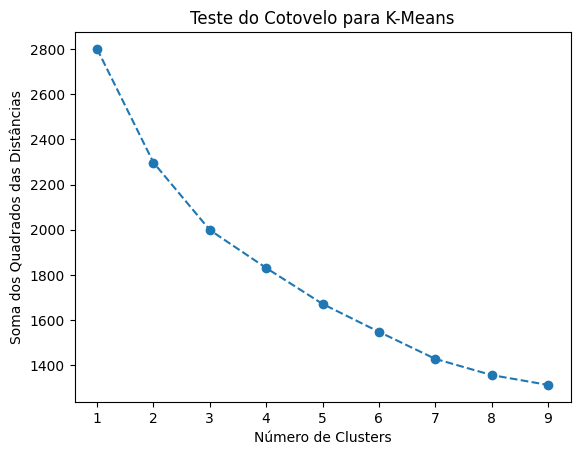

Silhouette Score for Hierarchical Clustering with single linkage: 0.11582433525097763
Silhouette Score for Hierarchical Clustering with complete linkage: 0.08913254367475561
Silhouette Score for K-Means with K=3: 0.1569656841720772


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Carregar os dados
x = pd.read_csv('Processed_data.csv')

# Normalizar os dados
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# K-Means
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

# Plotar o gráfico do teste do cotovelo
plt.plot(range(1, 10), wcss, marker='o', linestyle='--')
plt.title('Teste do Cotovelo para K-Means')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma dos Quadrados das Distâncias')
plt.show()

# Escolher o valor de K com base no teste do cotovelo
k = 3  # Valor selecionado do teste do cotovelo

# Executar K-Means com o valor de K selecionado
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans.fit(x_scaled)

# Executar o algoritmo hierárquico com diferentes métodos de ligação
methods = ['single', 'complete']  # Métodos de ligação
for method in methods:
    clustering = AgglomerativeClustering(n_clusters=k, linkage=method)
    clustering.fit(x_scaled)
    silhouette_avg = silhouette_score(x_scaled, clustering.labels_)
    print(f'Silhouette Score, {method} linkage: {silhouette_avg}')

# Comparar os resultados do K-Means e do algoritmo hierárquico
silhouette_avg_kmeans = silhouette_score(x_scaled, kmeans.labels_)
print(f'Silhouette Score, K-Means with K={k}: {silhouette_avg_kmeans}')



Pelos dados de teste, é notavel que os valores do teste estão próximos de zero, o que indica uma sobreposição entre os grupos, o que não está longe da realidade, porque os grupos de cachorros muitas vezes são similares, como no caso dos grupos "Foundation Stock Service" e "Miscellaneous Class", que a única diferença na classificação é que um foi aceito pelo AKC, e a outra está esperando a aceitação.